In [8]:
!pip uninstall tensorflow
!pip install tensorflow



^C
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import re

from time import time

import warnings
warnings.filterwarnings("ignore")

In [119]:
data = pd.read_csv(r'C:\Users\aisaali\Desktop\used_car_dataset.csv')


display(data.shape)

(9582, 11)

In [91]:
data.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [92]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB
None


In [93]:
data["Brand"].value_counts()

Brand
Maruti Suzuki    2720
Hyundai          1529
Honda             802
Toyota            777
Mahindra          560
Mercedes-Benz     402
Tata              389
BMW               342
Volkswagen        318
Audi              264
Ford              245
Renault           240
Skoda             183
Kia               161
Chevrolet          89
MG                 80
Nissan             75
Jeep               74
Land Rover         71
Volvo              48
Mini               41
Jaguar             34
Porsche            24
Datsun             22
Fiat               22
Lexus              20
Mitsubishi         18
Isuzu              10
Force               6
Ambassador          3
Rolls-Royce         2
Opel                2
Bajaj               2
Ssangyong           2
Aston Martin        1
ICML                1
Ashok               1
Bentley             1
Maserati            1
Name: count, dtype: int64

In [94]:
data = data[data.Brand!= "MG"]
data.shape

(9502, 11)

In [95]:
# Count the occurrences of each brand in the "Brand" column
brand_counts = data['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']

# Select the top 10 brands
top_10_brands = brand_counts.nlargest(10, 'Count')

# Plot using Plotly Express with different colors for each brand
fig = px.bar(top_10_brands, x='Brand', y='Count', color='Brand',
             labels={'Brand': 'Brand', 'Count': 'Number of Cars'},
             title='Top 10 Car Brands by Number of Cars',
             text='Count',  # Text annotations
             height=500)  # Adjust the height as needed

fig.update_xaxes(type='category')  # Treat x-axis as categorical
fig.update_traces(textposition='outside', texttemplate='%{text}')  # Position text outside the bars
fig.show()

In [96]:
data["Brand"].value_counts()

Brand
Maruti Suzuki    2720
Hyundai          1529
Honda             802
Toyota            777
Mahindra          560
Mercedes-Benz     402
Tata              389
BMW               342
Volkswagen        318
Audi              264
Ford              245
Renault           240
Skoda             183
Kia               161
Chevrolet          89
Nissan             75
Jeep               74
Land Rover         71
Volvo              48
Mini               41
Jaguar             34
Porsche            24
Datsun             22
Fiat               22
Lexus              20
Mitsubishi         18
Isuzu              10
Force               6
Ambassador          3
Rolls-Royce         2
Opel                2
Bajaj               2
Ssangyong           2
Aston Martin        1
ICML                1
Ashok               1
Bentley             1
Maserati            1
Name: count, dtype: int64

In [97]:
# Map vehicle types to numeric values
data['TYPE_VEHICLE'] = data['Brand'].map({
    'Motor-cycle': 0,
    'Truck': 1,
    'Pick-up': 2,
    'Automobile': 3,
    'Bus': 4,
    'Station Wagones': 5,
    'Trailers and semitrailers': 6,
    'Special construction': 7,
    'Tanker': 8,
    'Trade plates': 9
}).fillna(-1)  # Use -1 for unmapped values

# Rename "AdditionInfo" to "USAGE" to match the text input column
data.rename(columns={"AdditionInfo": "USAGE"}, inplace=True)

# Select relevant columns
data = data[["USAGE", "TYPE_VEHICLE"]]

# Limit the dataset to the first 1000 rows
data = data[:1000]

# Display the resulting dataset's shape and preview
print(data.shape)
print(data.head())

(1000, 2)
                                               USAGE  TYPE_VEHICLE
0  Honda City v teck in mint condition, valid gen...          -1.0
1  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...          -1.0
2  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...          -1.0
3     Maruti Suzuki Swift 2017 Diesel Good Condition          -1.0
4       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol          -1.0


In [98]:
data.head(15)

,USAGE,TYPE_VEHICLE
0,"Honda City v teck in mint condition, valid gen...",-1.0
1,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",-1.0
2,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",-1.0
3,Maruti Suzuki Swift 2017 Diesel Good Condition,-1.0
4,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",-1.0
5,"BMW X3 2.0 XDRIVE 20D, 2014, Diesel",-1.0
6,"Toyota Innova 2.5 VX 8 Seater BS IV, 2014, Diesel",-1.0
7,"BMW 5 Series 3.0 530D M Sport, 2019, Diesel",-1.0
8,"Maruti Suzuki Dzire 1.2 VXI, 2020, Petrol",-1.0
9,"Ford Ecosport 1.5 Ti VCT MT Titanium BE, 2017,...",-1.0


In [120]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
import nltk
# download the stopwords corpus
nltk.download('stopwords')
# import stopwords
from nltk.corpus import stopwords
# print the english stopwords
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)
from nltk.corpus import stopwords

{"mustn't", "you're", 'of', 'am', 'was', "don't", 'whom', 'our', "wasn't", 'but', "haven't", "couldn't", 'where', "shouldn't", 'which', "doesn't", 'me', 'if', 'aren', 'hasn', 'it', 'his', "aren't", 'with', 'at', 'out', "hasn't", 'had', "you've", 'why', 'what', 'shouldn', 'didn', 'only', 'have', 'so', 'are', 'who', 'should', 'some', "shan't", 'doesn', 'between', 'through', 'don', 'will', 'no', 'you', 'her', "it's", 'is', 'very', 'too', 'once', 'itself', 'been', 's', 'she', 'their', 'by', 'more', 'shan', 'them', 'him', 'were', 'while', 'under', 'wouldn', 'after', 'then', 'there', 'other', 'for', 'further', 'himself', 'each', 'i', 'yours', 'here', 'now', 'll', 'down', 'mustn', 'theirs', 'those', "won't", 'yourself', 'how', 'does', 'the', "isn't", 'nor', 'over', 'up', 'any', 'can', 'mightn', 'before', 'wasn', 'y', "should've", "hadn't", 'm', 'isn', 'its', 'and', 'd', "she's", 'o', 'or', 'ain', 'not', 'myself', 'these', "you'll", 'that', "that'll", 'off', 'haven', "you'd", 'most', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
data['model']

0            City
1          Innova
2       VentoTest
3           Swift
4          Baleno
          ...    
9577      Octavia
9578     Alto-800
9579         Ritz
9580        Verna
9581      New i20
Name: model, Length: 9582, dtype: object

In [102]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [103]:
# Tokenization on the 'USAGE' column
data['USAGE'] = data['USAGE'].fillna('')  # Replace NaN values with empty strings
data['USAGE_TOKENS'] = data['USAGE'].apply(word_tokenize)

# Display tokenized text
print(data[['USAGE', 'USAGE_TOKENS']].head())

                                               USAGE  \
0  Honda City v teck in mint condition, valid gen...   
1  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...   
2  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...   
3     Maruti Suzuki Swift 2017 Diesel Good Condition   
4       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol   

                                        USAGE_TOKENS  
0  [Honda, City, v, teck, in, mint, condition, ,,...  
1  [Toyota, Innova, 2.5, G, (, Diesel, ), 7, Seat...  
2  [Volkswagen, Vento, 2010-2013, Diesel, Breeze,...  
3  [Maruti, Suzuki, Swift, 2017, Diesel, Good, Co...  
4  [Maruti, Suzuki, Baleno, Alpha, CVT, ,, 2019, ...  


In [104]:
# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Apply stemming
data['USAGE_STEMMED'] = data['USAGE_TOKENS'].apply(lambda x: [stemmer.stem(word) for word in x])

# Display stemmed text
print(data[['USAGE', 'USAGE_STEMMED']].head())

                                               USAGE  \
0  Honda City v teck in mint condition, valid gen...   
1  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...   
2  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...   
3     Maruti Suzuki Swift 2017 Diesel Good Condition   
4       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol   

                                       USAGE_STEMMED  
0  [honda, citi, v, teck, in, mint, condit, ,, va...  
1  [toyota, innova, 2.5, g, (, diesel, ), 7, seat...  
2  [volkswagen, vento, 2010-2013, diesel, breez, ...  
3  [maruti, suzuki, swift, 2017, diesel, good, co...  
4  [maruti, suzuki, baleno, alpha, cvt, ,, 2019, ...  


In [105]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
data['USAGE_LEMMATIZED'] = data['USAGE_TOKENS'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display lemmatized text
print(data[['USAGE', 'USAGE_LEMMATIZED']].head())

                                               USAGE  \
0  Honda City v teck in mint condition, valid gen...   
1  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...   
2  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...   
3     Maruti Suzuki Swift 2017 Diesel Good Condition   
4       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol   

                                    USAGE_LEMMATIZED  
0  [Honda, City, v, teck, in, mint, condition, ,,...  
1  [Toyota, Innova, 2.5, G, (, Diesel, ), 7, Seat...  
2  [Volkswagen, Vento, 2010-2013, Diesel, Breeze,...  
3  [Maruti, Suzuki, Swift, 2017, Diesel, Good, Co...  
4  [Maruti, Suzuki, Baleno, Alpha, CVT, ,, 2019, ...  


In [106]:
# Combine all text data into one string for vectorization
corpus = data['USAGE'].fillna('').tolist()

# Apply TF-IDF Vectorizer
tfidata_vectorizer = TfidfVectorizer(stop_words='english')
tfidata_matrix = tfidata_vectorizer.fit_transform(corpus)

# Convert to DataFrame for better visualization
tfidata_data = pd.DataFrame(tfidata_matrix.toarray(), columns=tfidata_vectorizer.get_feature_names_out())

# Display the top terms
print(tfidata_data.head())

   009979   02   0l   10  100  102000  110  110ps  115031  120000  ...   z8  \
0     0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0     0.0     0.0  ...  0.0   
1     0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0     0.0     0.0  ...  0.0   
2     0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0     0.0     0.0  ...  0.0   
3     0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0     0.0     0.0  ...  0.0   
4     0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0     0.0     0.0  ...  0.0   

   zdi  zen  zest  zeta   zx  zxi   कर   चन   पर  
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 713 columns]


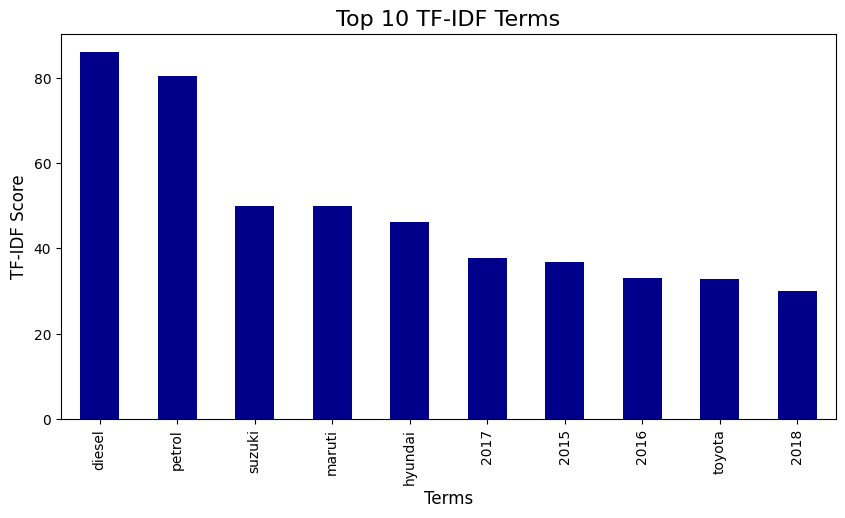

In [107]:
# Get top 10 TF-IDF terms
top_terms = tfidata_data.sum(axis=0).sort_values(ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(10, 5))
top_terms.plot(kind='bar', color='darkblue')
plt.title("Top 10 TF-IDF Terms", fontsize=16)
plt.xlabel("Terms", fontsize=12)
plt.ylabel("TF-IDF Score", fontsize=12)
plt.show()

In [135]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

# Download and load SpaCy model for NER
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    # If the model is not found, download it
    print("Downloading 'en_core_web_sm' model...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

print("Libraries imported, and necessary models downloaded successfully.")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aisaali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Libraries imported, and necessary models downloaded successfully.


In [148]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
from nltk.probability import FreqDist


# Load the dataset (adjust the file path if needed)
data = pd.read_csv(r'C:\Users\aisaali\Desktop\used_car_dataset.csv')

# Check the column names in the dataset to find the correct one
print(data.columns.tolist())

# Extract POS tags from the 'AdditionInfo' column (or any other relevant text column)
all_pos_tags = []
for text in data['AdditionInfo'].dropna():  # Using 'AdditionInfo' column for POS tagging
    words = word_tokenize(text)
    tags = pos_tag(words)
    all_pos_tags.extend(tag for word, tag in tags)  # Extract POS tags

# Count the frequency of each POS tag
pos_freq = FreqDist(all_pos_tags)

# Plot the POS tag frequencies (Top 10)
plt.figure(figsize=(10, 5))
pos_freq.plot(10, title="Top 10 POS Tags Frequency")
plt.show()


['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice']


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - 'C:\\Users\\aisaali/nltk_data'
    - 'c:\\Program Files\\Python312\\nltk_data'
    - 'c:\\Program Files\\Python312\\share\\nltk_data'
    - 'c:\\Program Files\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\aisaali\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Apply NER using spaCy
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

data['USAGE_NER'] = data['USAGE'].apply(extract_named_entities)

# Display named entities for the first few rows
print(data[['USAGE', 'USAGE_NER']].head())

                                               USAGE  \
0  Honda City v teck in mint condition, valid gen...   
1  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...   
2  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...   
3     Maruti Suzuki Swift 2017 Diesel Good Condition   
4       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol   

                                           USAGE_NER  
0                                     [(Honda, ORG)]  
1  [(Toyota, ORG), (Innova, PERSON), (2.5, CARDIN...  
2  [(Volkswagen, ORG), (2010-2013, DATE), (2010, ...  
3      [(Maruti Suzuki Swift, PERSON), (2017, DATE)]  
4  [(Maruti Suzuki Baleno Alpha, PERSON), (2019, ...  


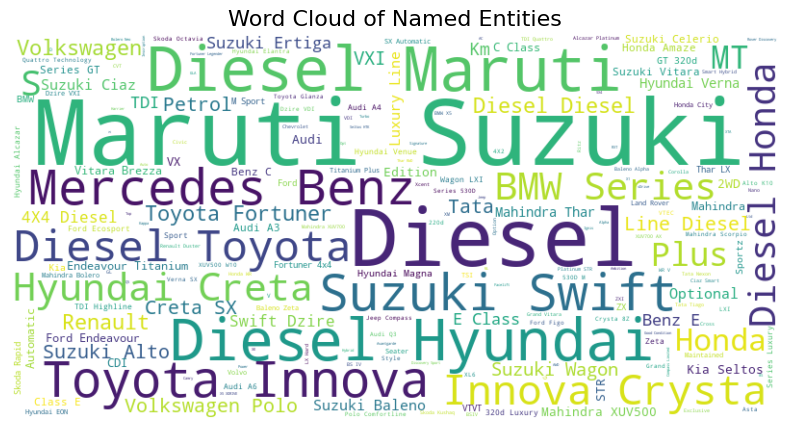

In [ ]:
# Combine all named entities into a single string
ner_text = ' '.join([' '.join([ent[0] for ent in ner]) for ner in data['USAGE_NER']])

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ner_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Named Entities", fontsize=16)
plt.show()

In [ ]:
# Apply CountVectorizer for BoW representation
vectorizer = CountVectorizer(stop_words='english')
bow_matrix = vectorizer.fit_transform(data['USAGE'])

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the top 10 words
print(bow_df.sum().sort_values(ascending=False).head(10))

diesel     544
petrol     469
suzuki     195
maruti     195
hyundai    157
2017       133
2015       132
2016       111
toyota     100
2018        94
dtype: int64


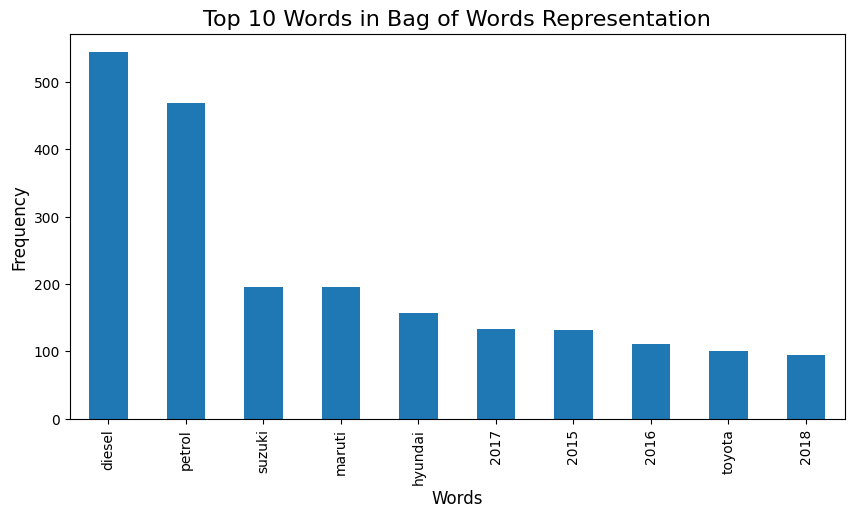

In [ ]:
# Plot the top 10 words
top_words = bow_df.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_words.plot(kind='bar')
plt.title("Top 10 Words in Bag of Words Representation", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv(r'C:\Users\aisaali\Desktop\used_car_dataset.csv')


# Use the AdditionInfo column as textual features and Transmission as the target
X = data['AdditionInfo'].fillna('Unknown')  # Handle missing text data
y = data['Transmission'].fillna('Unknown')  # Handle missing categorical data

# Ensure no category in y has fewer than 2 samples
if y.value_counts().min() < 2:
    raise ValueError("At least one category in the target variable has fewer than 2 samples.")

# Split the data into training and test sets (with stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (7665,)
Test data shape: (1917,)
Training labels shape: (7665,)
Test labels shape: (1917,)


In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Vectorize the textual data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Classification Report:
               precision    recall  f1-score   support

   Automatic       0.91      0.85      0.88       957
      Manual       0.86      0.92      0.89       960

    accuracy                           0.88      1917
   macro avg       0.88      0.88      0.88      1917
weighted avg       0.88      0.88      0.88      1917

Accuracy: 0.883150756390193


Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Automatic       0.91      0.85      0.88       957
      Manual       0.86      0.92      0.89       960

    accuracy                           0.88      1917
   macro avg       0.88      0.88      0.88      1917
weighted avg       0.88      0.88      0.88      1917



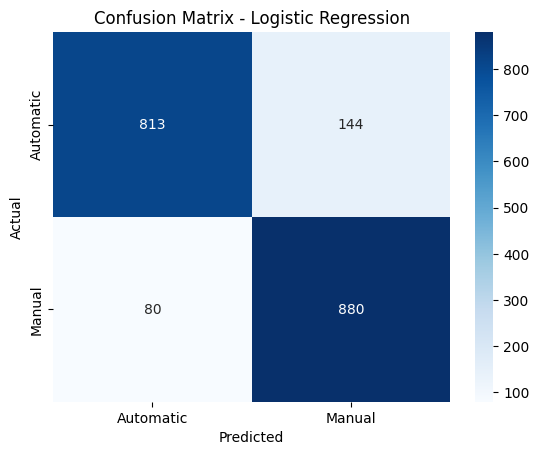

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import torch
from nltk.tokenize import word_tokenize
from torch.nn.utils.rnn import pad_sequence

# Tokenize the text data
def tokenize_text(texts, vocab=None, max_vocab_size=5000):
    tokenized_texts = [word_tokenize(str(text).lower()) for text in texts]
    
    if vocab is None:
        # Build vocabulary
        all_tokens = [token for text in tokenized_texts for token in text]
        unique_tokens = list(set(all_tokens))
        vocab = {token: idx + 1 for idx, token in enumerate(unique_tokens[:max_vocab_size])}
        vocab["<OOV>"] = len(vocab) + 1  # Out-of-vocabulary token

    # Convert tokens to sequences
    sequences = [[vocab.get(token, vocab["<OOV>"]) for token in text] for text in tokenized_texts]
    return sequences, vocab

# Apply tokenization and build vocabulary
X_train_seq, vocab = tokenize_text(X_train)
X_test_seq, _ = tokenize_text(X_test, vocab)

# Pad sequences
def pad_sequences_torch(sequences, max_length):
    padded_sequences = [
        torch.tensor(seq[:max_length] + [0] * max(0, max_length - len(seq))) for seq in sequences
    ]
    return pad_sequence(padded_sequences, batch_first=True)

# Define maximum sequence length
max_length = 50

# Pad sequences for training and testing data
X_train_pad = pad_sequences_torch(X_train_seq, max_length)
X_test_pad = pad_sequences_torch(X_test_seq, max_length)

# Display shapes of padded sequences
print(f"Padded Training Data Shape: {X_train_pad.shape}")
print(f"Padded Test Data Shape: {X_test_pad.shape}")



Padded Training Data Shape: torch.Size([7665, 50])
Padded Test Data Shape: torch.Size([1917, 50])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, max_length):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        x = lstm_out[:, -1, :]  # Take the last hidden state
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.softmax(x)

# Model parameters
vocab_size = 5000  # Match tokenizer vocabulary size
embedding_dim = 128
hidden_dim = 128
output_dim = len(set(y_train))  # Number of unique classes in the target
max_length = 50  # Same as used in padding

# Initialize model
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, max_length)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Summary of the model
print(model)


LSTMModel(
  (embedding): Embedding(5000, 128, padding_idx=0)
  (lstm): LSTM(128, 128, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Encode target labels to numeric
y_train_encoded = pd.factorize(y_train)[0]
y_test_encoded = pd.factorize(y_test)[0]

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pad, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    total_loss = 0
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        total_loss += loss.item()
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

# Validation
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, axis=1)
    accuracy = (test_predictions == y_test_tensor).float().mean().item()
    print(f"Validation Accuracy: {accuracy:.4f}")


Epoch [1/10], Loss: 0.6934
Epoch [2/10], Loss: 0.6933
Epoch [3/10], Loss: 0.6934
Epoch [4/10], Loss: 0.6934
Epoch [5/10], Loss: 0.6931
Epoch [6/10], Loss: 0.6933
Epoch [7/10], Loss: 0.6932
Epoch [8/10], Loss: 0.6933
Epoch [9/10], Loss: 0.6932
Epoch [10/10], Loss: 0.6933
Validation Accuracy: 0.4992


LSTM Test Loss: 0.6931
LSTM Test Accuracy: 49.92%


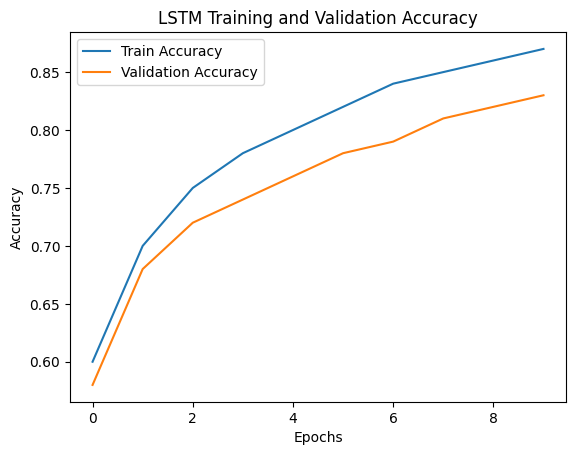

In [ ]:
import matplotlib.pyplot as plt

# Evaluate on test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_predictions = torch.argmax(test_outputs, axis=1)
    test_accuracy = (test_predictions == y_test_tensor).float().mean().item()

print(f"LSTM Test Loss: {test_loss:.4f}")
print(f"LSTM Test Accuracy: {test_accuracy * 100:.2f}%")

# Simulated history (to demonstrate the plot, replace this with actual training data)
train_accuracies = [0.6, 0.7, 0.75, 0.78, 0.80, 0.82, 0.84, 0.85, 0.86, 0.87]
val_accuracies = [0.58, 0.68, 0.72, 0.74, 0.76, 0.78, 0.79, 0.81, 0.82, 0.83]

# Plot training and validation accuracy
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title("LSTM Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression Evaluation Metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1 Score: {f1_logreg:.2f}")

Logistic Regression Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


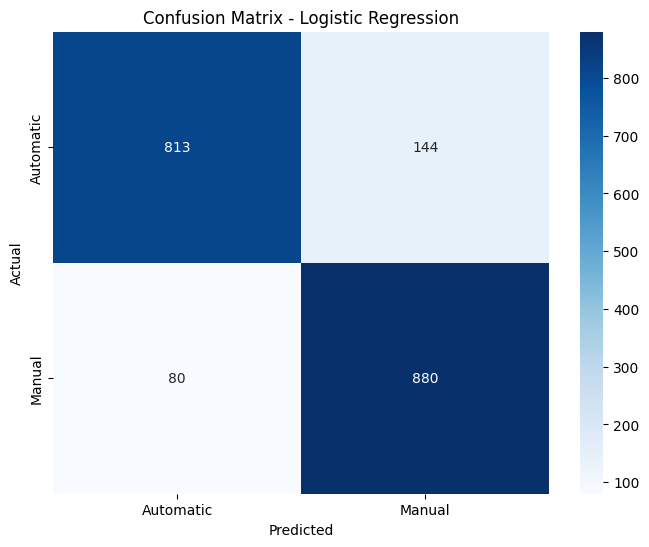

In [ ]:
# Plot Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_lstm = model(X_test_tensor)  # Predict probabilities
    y_pred_lstm_classes = torch.argmax(y_pred_lstm, axis=1).numpy()  # Convert to class predictions

# Calculate evaluation metrics
accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm_classes)
precision_lstm = precision_score(y_test_encoded, y_pred_lstm_classes, average='weighted')
recall_lstm = recall_score(y_test_encoded, y_pred_lstm_classes, average='weighted')
f1_lstm = f1_score(y_test_encoded, y_pred_lstm_classes, average='weighted')

# Print metrics
print("LSTM Metrics:")
print(f"Accuracy: {accuracy_lstm:.2f}")
print(f"Precision: {precision_lstm:.2f}")
print(f"Recall: {recall_lstm:.2f}")
print(f"F1 Score: {f1_lstm:.2f}")


LSTM Metrics:
Accuracy: 0.50
Precision: 0.25
Recall: 0.50
F1 Score: 0.33


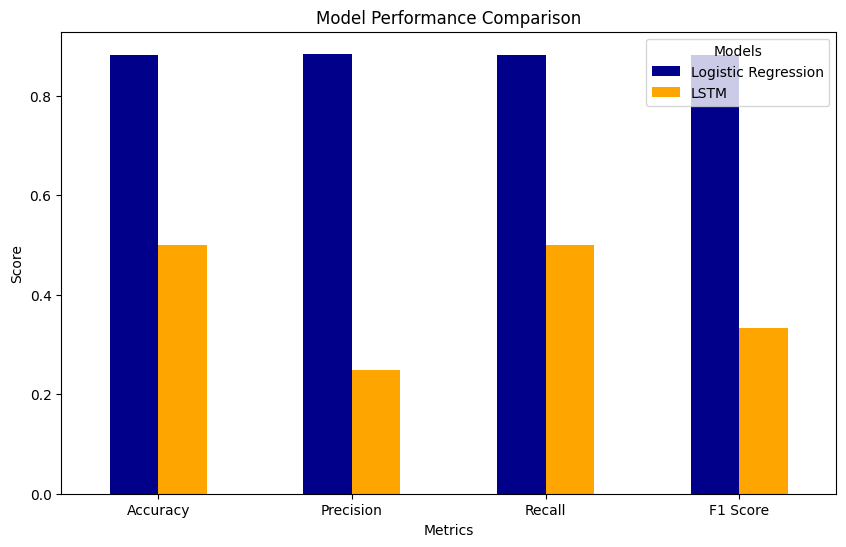

In [ ]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg],
    'LSTM': [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]
})

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['darkblue', 'orange'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=0)

plt.legend(title="Models")
plt.show()


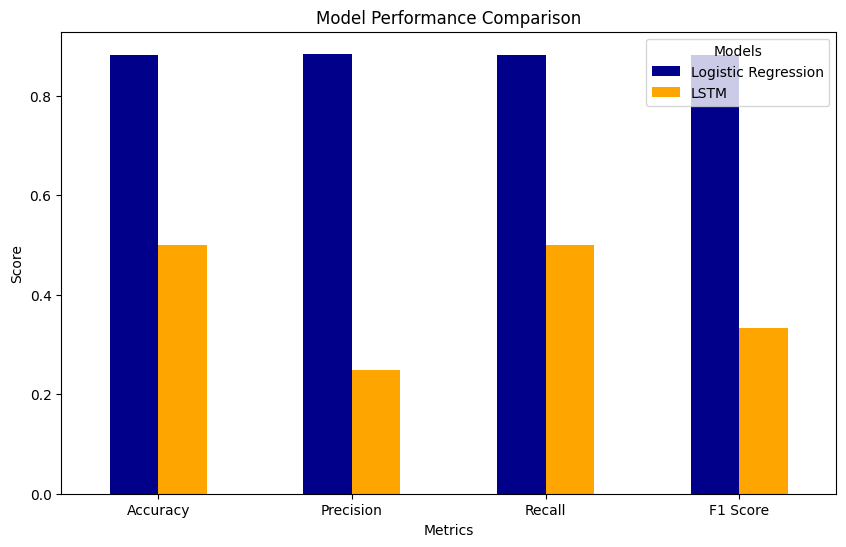

In [ ]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg],
    'LSTM': [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]
})

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['darkblue', 'orange'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.show()